### Importing Libraries

The following code imports all the necessary libraries for data manipulation, visualization, geospatial analysis, and machine learning.

In [1]:
# all the libraries used in this data
import pandas as pd  # For data manipulation and analysis
import json  # For working with JSON data
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization
import geopandas as gpd  # For working with geospatial data
import matplotlib.pyplot as plt  # For plotting (imported again, can be removed)
from shapely.geometry import Point  # For creating point geometries
import contextily as ctx  # For adding basemaps to plots
import statsmodels.api as sm  # For statistical modeling and econometrics
import torch  # For deep learning with PyTorch
import torch.nn as nn  # Neural network modules for PyTorch
import torch.optim as optim  # Optimization algorithms for PyTorch
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.metrics import mean_squared_error  # For calculating mean squared error

### If you are using Google Colab File Upload

This chunk contains commented-out code for uploading files in Google Colab. It's not being used in the current execution but can be uncommented if working in Colab.

In [2]:
"""

# if you are using google colab
#from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
"""

'\n\n# if you are using google colab\n#from google.colab import files\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))\n'

### Loading JSON Data

Loading the JSON data from a file named 'data.json'.

## Data Credit : RocketAlert.live

In [3]:
with open('data.json', 'r') as f:
  json_file = json.load(f)  # Load JSON data from file

### Inspecting JSON Keys

Print the keys of the loaded JSON data to understand its structure.

In [4]:
json_file.keys()  # Display the top-level keys of the JSON data

dict_keys(['Credit', 'payload'])

### Extracting Rocket Data

Extract the 'payload' key from the JSON data, which contains the rocket information.

In [8]:
rockets_data = json_file['payload']  # Extract the 'payload' data containing rocket information

{'date': '2023-10-07',
 'alerts': [{'name': 'בת-ים',
   'englishName': 'Bat Yam',
   'lat': 32.0132,
   'lon': 34.748,
   'taCityId': 1866,
   'alertTypeId': 1,
   'countdownSec': 90,
   'areaNameHe': 'דן',
   'areaNameEn': 'Dan',
   'timeStamp': '2023-10-07 06:29:00'},
  {'name': 'ניצנים',
   'englishName': 'Nitzanim',
   'lat': 31.7178,
   'lon': 34.6346,
   'taCityId': 376,
   'alertTypeId': 1,
   'countdownSec': 30,
   'areaNameHe': 'מערב לכיש',
   'areaNameEn': 'Western Lakhish',
   'timeStamp': '2023-10-07 07:19:33'},
  ...]}

### Normalizing JSON Data

Using pandas, normalize the nested JSON data into a flat DataFrame.

In [ ]:
data_norm = pd.json_normalize(rockets_data)  # Flatten nested JSON data into a pandas DataFrame
data_norm  # Display the normalized data

,date,alerts
0,2023-10-07,"[{'name': 'בת-ים', 'englishName': 'Bat Yam', '..."
1,2023-10-08,"[{'name': 'שדרות, איבים, ניר עם', 'englishName..."
2,2023-10-09,"[{'name': 'אזור תעשייה הדרומי אשקלון', 'englis..."
3,2023-10-10,"[{'name': 'כפר עזה', 'englishName': 'Kfar Azza..."
4,2023-10-11,"[{'name': 'נתיב העשרה', 'englishName': 'Netiv ..."
...,...,...
281,2024-07-26,"[{'name': 'יתד', 'englishName': 'Yated', 'lat'..."
282,2024-07-27,"[{'name': 'קריית שמונה', 'englishName': 'Kirya..."
283,2024-07-28,"[{'name': 'נתיב העשרה', 'englishName': 'Netiv ..."
284,2024-07-29,"[{'name': 'אדמית', 'englishName': 'Idmit', 'la..."


### Flattening and Structuring Data

This chunk further processes the data by flattening the nested structure and creating a more usable DataFrame.

In [ ]:
#  `rockets_data` is list of dictionaries
flattened_data = []

for entry in rockets_data:
    date = entry['date']
    alerts = entry['alerts']

    for alert in alerts:
        # Flatten the data and append to the list
        flattened_data.append({
            'date': date,
            'englishName': alert['englishName'],
            'name': alert['name'],
            'lat': alert['lat'],
            'lon': alert['lon'],
            'taCityId': alert['taCityId'],
            'alertTypeId': alert['alertTypeId'],
            'countdownSec': alert['countdownSec'],
            'areaNameHe': alert['areaNameHe'],
            'areaNameEn': alert['areaNameEn'],
            'lat': alert['lat'],  # Duplicate key, might want to remove one
            'lon': alert['lon'],  # Duplicate key, might want to remove one
            'timeStamp': alert['timeStamp']
        })

# Convert the list of flattened data to a pandas DataFrame
df = pd.DataFrame(flattened_data)

# Ensure that each observation has a unique index
df.reset_index(drop=True, inplace=True)

# Preview the DataFrame
print(df)

             date           englishName                name      lat      lon  \
0      2023-10-07               Bat Yam               בת-ים  32.0132  34.7480   
1      2023-10-07             Palmachim              פלמחים  31.9327  34.7069   
2      2023-10-07  Rishon LeZion - West  ראשון לציון - מערב  31.9810  34.7679   
3      2023-10-07        Netiv HaAssara          נתיב העשרה  31.5724  34.5393   
4      2023-10-07         Yad Mordechai            יד מרדכי  31.5870  34.5575   
...           ...                   ...                 ...      ...      ...   
13941  2024-07-30        Ma'ayan Baruch          מעיין ברוך  33.2393  35.6094   
13942  2024-07-30            Kfar Yuval            כפר יובל  33.2466  35.5964   
13943  2024-07-30           Beit Hillel             בית הלל  33.2088  35.6065   
13944  2024-07-30         Kiryat Shmona         קריית שמונה  33.2079  35.5702   
13945  2024-07-30             HaGoshrim             הגושרים  33.2215  35.6230   

       taCityId  alertTypeI

### Selecting Relevant Columns and Converting Date

In [ ]:
df_rockets = df[['date', 'englishName','countdownSec', 'areaNameEn', 'timeStamp','lat','lon']]  # Select relevant columns
df_rockets['date'] = pd.to_datetime(df_rockets['date'])  # Convert 'date' to datetime
df_rockets  # Display the resulting DataFrame

/var/folders/2f/jfz4p2251cj_z1jwwk43x6pm0000gn/T/ipykernel_9505/647364080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rockets['date'] = pd.to_datetime(df_rockets['date'])  # Convert 'date' to datetime


,date,englishName,countdownSec,areaNameEn,timeStamp,lat,lon
0,2023-10-07,Bat Yam,90,Dan,2023-10-07 06:29:00,32.0132,34.7480
1,2023-10-07,Palmachim,90,Lakhish,2023-10-07 06:29:00,31.9327,34.7069
2,2023-10-07,Rishon LeZion - West,90,Shfela (Lowlands),2023-10-07 06:29:00,31.9810,34.7679
3,2023-10-07,Netiv HaAssara,15,Gaza Envelope,2023-10-07 06:29:02,31.5724,34.5393
4,2023-10-07,Yad Mordechai,15,Gaza Envelope,2023-10-07 06:29:03,31.5870,34.5575
...,...,...,...,...,...,...,...
13941,2024-07-30,Ma'ayan Baruch,0,Confrontation Line,2024-07-30 14:53:17,33.2393,35.6094
13942,2024-07-30,Kfar Yuval,0,Confrontation Line,2024-07-30 14:53:33,33.2466,35.5964
13943,2024-07-30,Beit Hillel,0,Confrontation Line,2024-07-30 16:26:53,33.2088,35.6065
13944,2024-07-30,Kiryat Shmona,0,Confrontation Line,2024-07-30 16:26:53,33.2079,35.5702


### Creating Time Categories

Processe the timestamp data to categorize alerts into different times of day (Morning, Noon, Evening, Night).

In [ ]:
# Convert timeStamp to datetime if not already
df_rockets['timeStamp'] = pd.to_datetime(df_rockets['timeStamp'])

# Extract the hour
df_rockets['hour'] = df_rockets['timeStamp'].dt.hour

# Create a function to categorize based on hour
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Noon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new categorical column
df_rockets['time_category'] = df_rockets['hour'].apply(categorize_hour)
df_rockets['time_category'] = pd.Categorical(df_rockets['time_category'], categories=['Morning', 'Noon', 'Evening', 'Night'])
df_rockets = df_rockets.drop('hour', axis=1)  # Remove the temporary 'hour' column
df_rockets  # Display the updated DataFrame

/var/folders/2f/jfz4p2251cj_z1jwwk43x6pm0000gn/T/ipykernel_9505/1258149844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rockets['timeStamp'] = pd.to_datetime(df_rockets['timeStamp'])
/var/folders/2f/jfz4p2251cj_z1jwwk43x6pm0000gn/T/ipykernel_9505/1258149844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rockets['hour'] = df_rockets['timeStamp'].dt.hour
/var/folders/2f/jfz4p2251cj_z1jwwk43x6pm0000gn/T/ipykernel_9505/1258149844.py:19: SettingWithCopyWarning: 
A value is trying to be set on a

,date,englishName,countdownSec,areaNameEn,timeStamp,lat,lon,time_category
0,2023-10-07,Bat Yam,90,Dan,2023-10-07 06:29:00,32.0132,34.7480,Morning
1,2023-10-07,Palmachim,90,Lakhish,2023-10-07 06:29:00,31.9327,34.7069,Morning
2,2023-10-07,Rishon LeZion - West,90,Shfela (Lowlands),2023-10-07 06:29:00,31.9810,34.7679,Morning
3,2023-10-07,Netiv HaAssara,15,Gaza Envelope,2023-10-07 06:29:02,31.5724,34.5393,Morning
4,2023-10-07,Yad Mordechai,15,Gaza Envelope,2023-10-07 06:29:03,31.5870,34.5575,Morning
...,...,...,...,...,...,...,...,...
13941,2024-07-30,Ma'ayan Baruch,0,Confrontation Line,2024-07-30 14:53:17,33.2393,35.6094,Noon
13942,2024-07-30,Kfar Yuval,0,Confrontation Line,2024-07-30 14:53:33,33.2466,35.5964,Noon
13943,2024-07-30,Beit Hillel,0,Confrontation Line,2024-07-30 16:26:53,33.2088,35.6065,Noon
13944,2024-07-30,Kiryat Shmona,0,Confrontation Line,2024-07-30 16:26:53,33.2079,35.5702,Noon


### Visualizing Alarms by Area

Create a bar plot to show the number of alarms for each area.

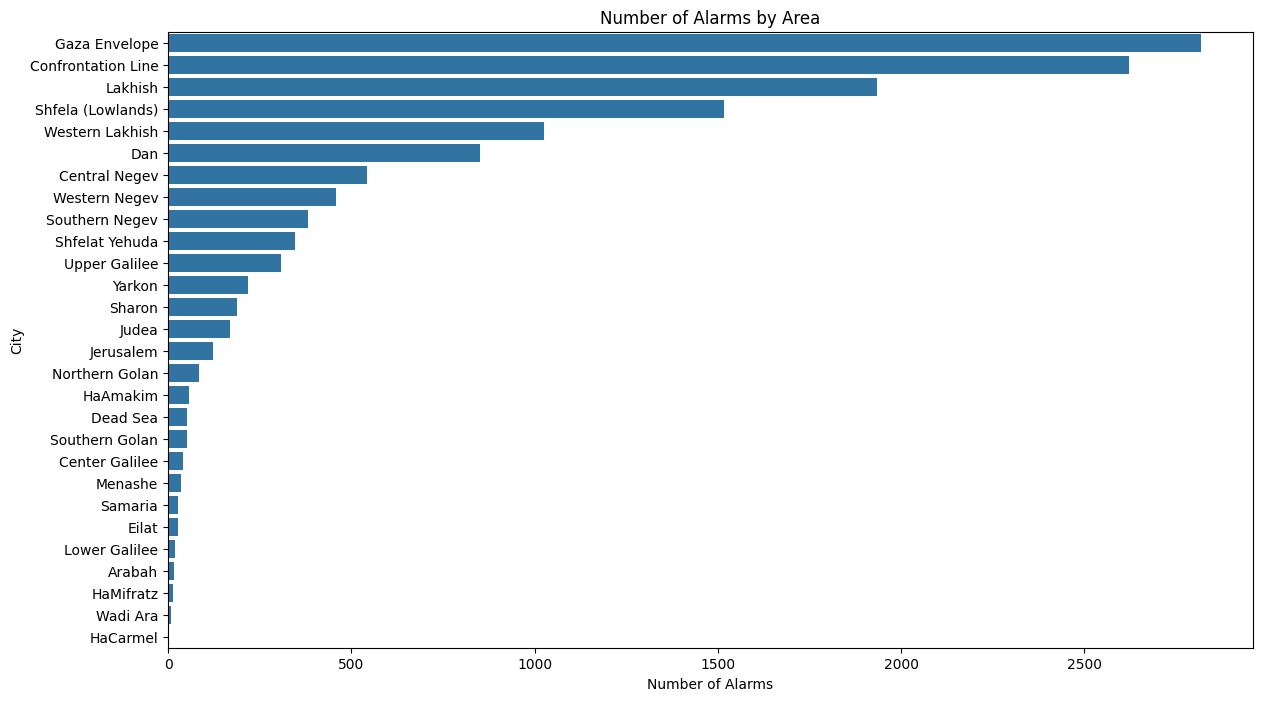

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.countplot(y='areaNameEn', data=df_rockets, order=df_rockets['areaNameEn'].value_counts().index)
plt.title('Number of Alarms by Area')
plt.xlabel('Number of Alarms')
plt.ylabel('City')
plt.show()


### Visualizing Total Alarms Over Time

Line plot to show the trend of total alarms over time.

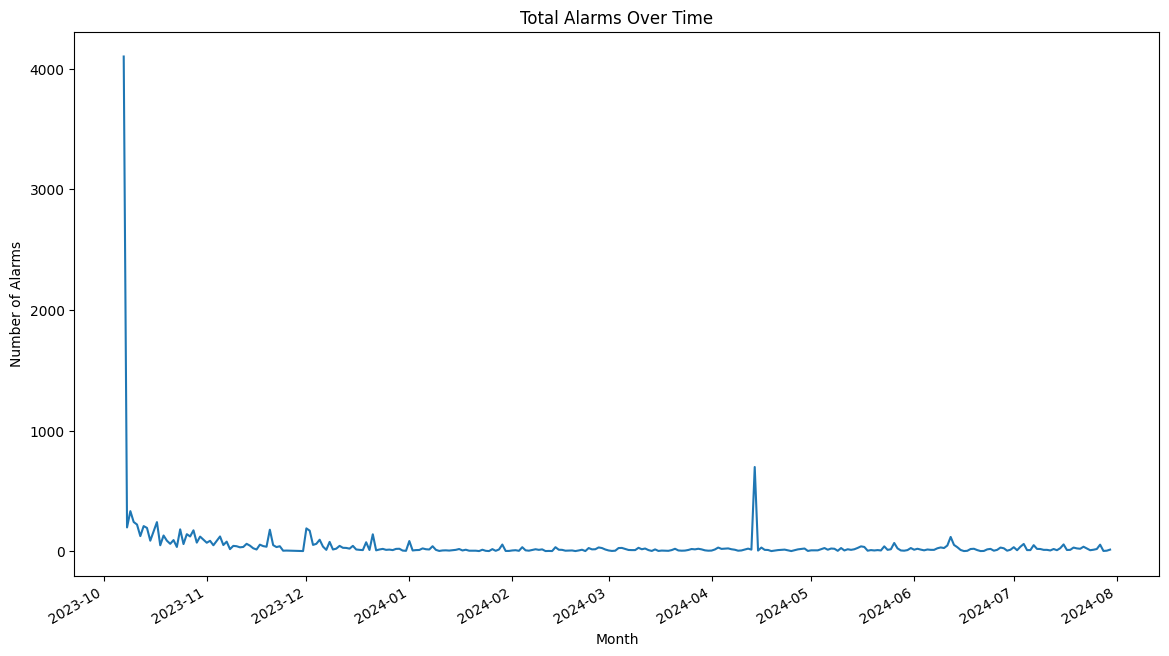

In [ ]:

plt.figure(figsize=(14, 8))
df_rockets.groupby('date').size().plot(kind='line')
plt.title('Total Alarms Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Alarms')
plt.show()


### Visualizing Alarms by Time of Day for All Cities

Create a stacked bar plot to show the distribution of alarms across different times of day for all areas.

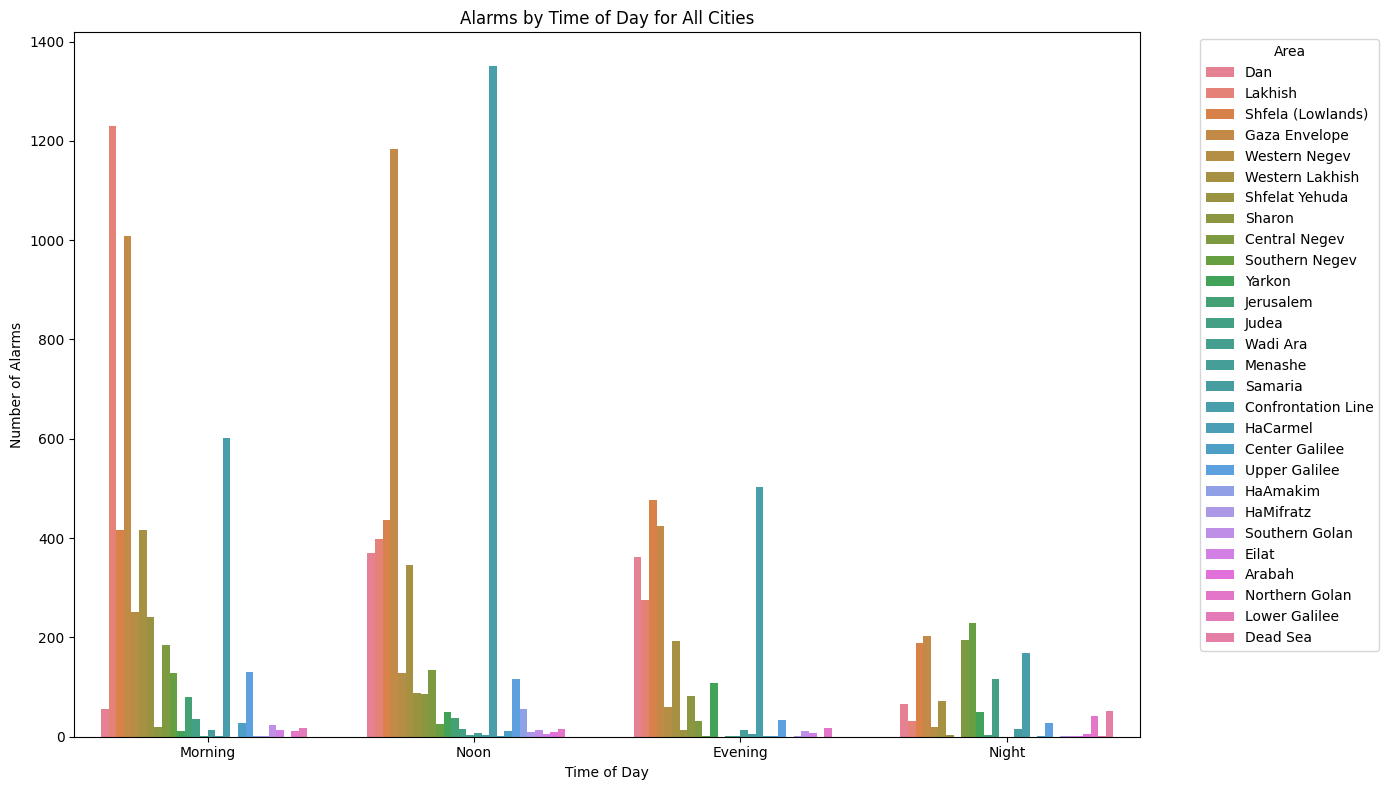

In [ ]:
# if we want to take only top areas:
# top_areas = df['areaNameEn'].value_counts().nlargest(5).index

# If we want to take all areas
all_areas = df['areaNameEn'].unique()
plt.figure(figsize=(14, 8))
sns.countplot(x='time_category', hue='areaNameEn', data=df_rockets[df_rockets['areaNameEn'].isin(all_areas)])
plt.title('Alarms by Time of Day for All Cities')
plt.xlabel('Time of Day')
plt.ylabel('Number of Alarms')
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.tight_layout()  # Adjust layout to prevent cutting off legend
plt.show()

### Creating a Geospatial Visualization

Creates a map visualization of the rocket alarm locations using geopandas and contextily.

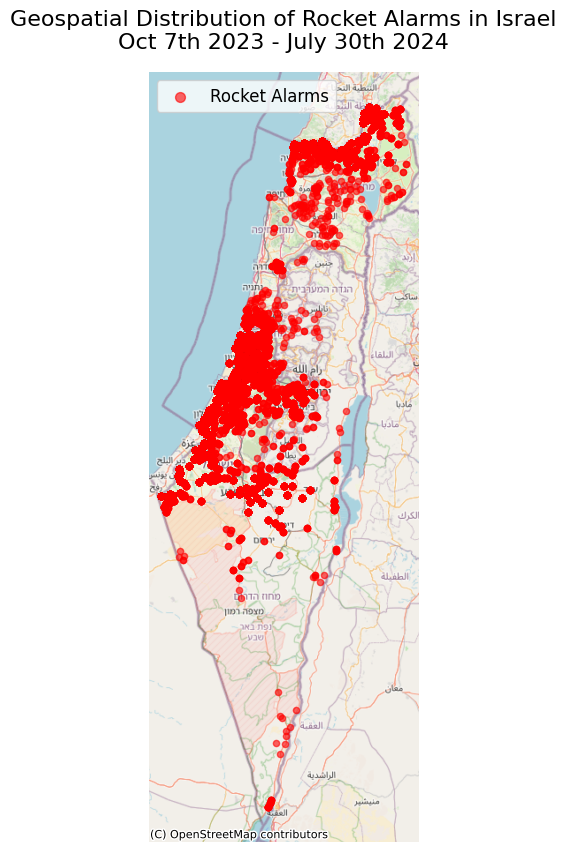

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# Create the GeoDataFrame
geometry = [Point(xy) for xy in zip(df_rockets['lon'], df_rockets['lat'])]
geo_df = gpd.GeoDataFrame(df_rockets, geometry=geometry)

# Set the coordinate reference system (CRS) to Web Mercator for compatibility with the basemap
geo_df = geo_df.set_crs("EPSG:4326")  # WGS84 Latitude/Longitude
geo_df = geo_df.to_crs("EPSG:3857")   # Web Mercator

# Plotting with contextily basemap
fig, ax = plt.subplots(figsize=(15, 10))

# Add the points
scatter = geo_df.plot(ax=ax, markersize=20, color='red', alpha=0.6, legend=True)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, crs=geo_df.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Add title and labels
plt.title('Geospatial Distribution of Rocket Alarms in Israel\nOct 7th 2023 - July 30th 2024', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add legend
plt.scatter([], [], c='red', alpha=0.6, s=50, label="Rocket Alarms")
ax.legend(loc="upper left", fontsize=12)

# Remove axis for a cleaner look
ax.set_axis_off()

plt.show()

### Merging Rocket Data with CPI Data

Load CPI (Consumer Price Index) data and merges it with the rocket alarm data based on the year and month.

In [ ]:
# Extract the month and year combination
df_rockets['year_month'] = pd.to_datetime(df_rockets['date']).dt.to_period('M')

# Load the CSV file into a pandas DataFrame
df_cpi = pd.read_csv('ISR_CPI.csv')
df_cpi['date'] = pd.to_datetime(df_cpi['DATE'])

# Extract the month and year combination
df_cpi['year_month'] = pd.to_datetime(df_cpi['date']).dt.to_period('M')

# Merge the two DataFrames on the 'year_month' column
df_combined = pd.merge(df_rockets, df_cpi, on='year_month', how='inner', 
                       suffixes=('', '_cpi'))

# Rename and drop irrelevant columns:
df_combined = df_combined.rename(columns={'ISRCPIALLMINMEI': 'NationalCPI'})
df_combined = df_combined.drop(columns=['date_cpi', 'timeStamp', 'lat', 'lon', 'DATE'])

df_combined  # Display the combined DataFrame

,date,englishName,countdownSec,areaNameEn,time_category,year_month,NationalCPI
0,2023-10-07,Bat Yam,90,Dan,Morning,2023-10,112.5167
1,2023-10-07,Palmachim,90,Lakhish,Morning,2023-10,112.5167
2,2023-10-07,Rishon LeZion - West,90,Shfela (Lowlands),Morning,2023-10,112.5167
3,2023-10-07,Netiv HaAssara,15,Gaza Envelope,Morning,2023-10,112.5167
4,2023-10-07,Yad Mordechai,15,Gaza Envelope,Morning,2023-10,112.5167
...,...,...,...,...,...,...,...
13298,2024-06-30,Kiryat Shmona,0,Confrontation Line,Noon,2024-06,114.4382
13299,2024-06-30,HaGoshrim,0,Confrontation Line,Noon,2024-06,114.4382
13300,2024-06-30,Beit Hillel,0,Confrontation Line,Noon,2024-06,114.4382
13301,2024-06-30,Ma'ayan Baruch,0,Confrontation Line,Noon,2024-06,114.4382


### Calculating Correlation Between Rocket Attacks and CPI by Area

Calculate the correlation between rocket attacks and National CPI for each area.

In [ ]:
# Grouping by areaNameEn and year_month to get the rocket counts and mean CPI per area
area_monthly_data = df_combined.groupby(['areaNameEn', 'year_month']).agg({'date': 'count', 'NationalCPI': 'mean'}).rename(columns={'date': 'rocket_count'})

# Calculating correlation for each area
area_correlation = area_monthly_data.groupby('areaNameEn').apply(lambda x: x['rocket_count'].corr(x['NationalCPI']))

# Display the correlation results
print(area_correlation.sort_values(ascending=False))

areaNameEn
Lower Galilee         1.000000
Samaria               1.000000
Shfela (Lowlands)     0.983786
Yarkon                0.978872
Judea                 0.975538
Shfelat Yehuda        0.962814
Confrontation Line    0.899326
Southern Negev        0.897815
Southern Golan        0.718769
Center Galilee        0.681156
Upper Galilee         0.562872
Northern Golan        0.323229
Lakhish               0.067642
Central Negev         0.029044
Eilat                -0.192774
Western Negev        -0.194677
Sharon               -0.200248
Dan                  -0.223327
Western Lakhish      -0.275657
HaMifratz            -0.282731
Gaza Envelope        -0.308393
Jerusalem            -0.348417
HaAmakim             -0.597948
Arabah               -1.000000
Dead Sea                   NaN
HaCarmel                   NaN
Menashe                    NaN
Wadi Ara                   NaN
dtype: float64


/Users/bar_bettash/anaconda3/envs/Projects_PY3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/bar_bettash/anaconda3/envs/Projects_PY3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/bar_bettash/anaconda3/envs/Projects_PY3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


### Visualizing Correlation Between Rocket Attacks and CPI by Area

Create a bar plot to visualize the correlation between rocket attacks and National CPI for each area.

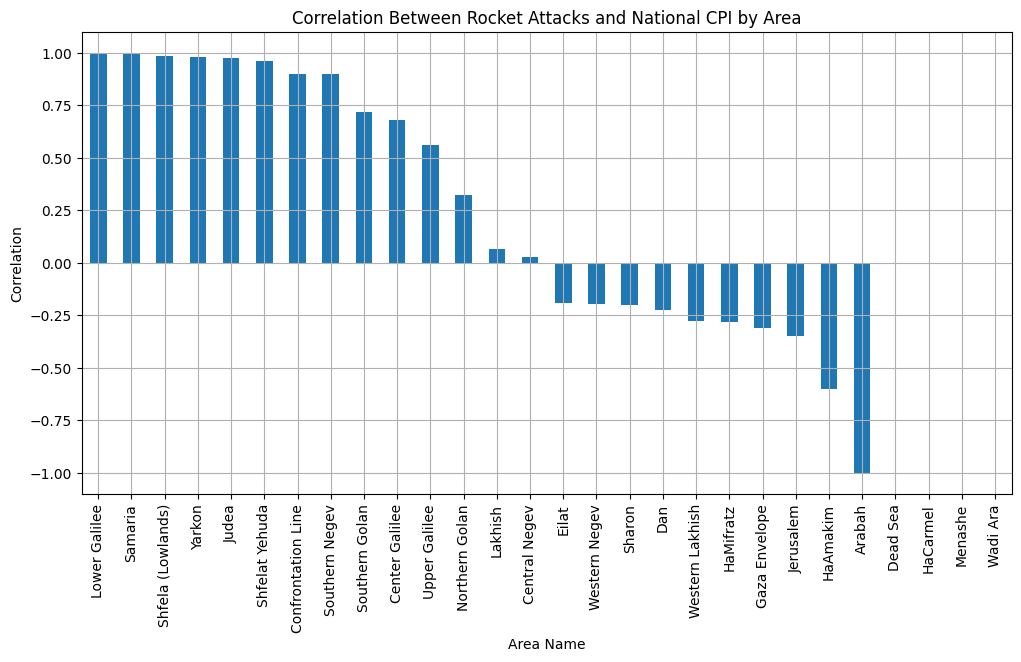

In [ ]:
# Plotting the correlation values
plt.figure(figsize=(12, 6))
area_correlation.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation Between Rocket Attacks and National CPI by Area')
plt.xlabel('Area Name')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()


### Performing Linear Regression Analysis

Perform a simple linear regression analysis to model the relationship between rocket attacks and National CPI.

In [ ]:
# Group by year_month to count the number of rocket attacks and calculate the average CPI
monthly_data = df_combined.groupby('year_month').agg(
    rocket_count=('date', 'size'),
    NationalCPI=('NationalCPI', 'mean')
).reset_index()

import statsmodels.api as sm

# Preparing the data for regression
X = monthly_data['rocket_count']
y = monthly_data['NationalCPI']

# Fit the linear regression model
model_no_const = sm.OLS(y,X).fit()

# Display the regression results
print(model_no_const.summary())

                                 OLS Regression Results                                
Dep. Variable:            NationalCPI   R-squared (uncentered):                   0.315
Model:                            OLS   Adj. R-squared (uncentered):              0.229
Method:                 Least Squares   F-statistic:                              3.680
Date:                Fri, 16 Aug 2024   Prob (F-statistic):                      0.0914
Time:                        18:17:43   Log-Likelihood:                         -53.618
No. Observations:                   9   AIC:                                      109.2
Df Residuals:                       8   BIC:                                      109.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/Users/bar_bettash/anaconda3/envs/Projects_PY3.11/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


# Machine Learning Model (Pytorch & Scikit-Learn)


## Explanation of the Model

### **Objective**

The primary objective of the model is to predict how much a rocket fired at Israeli cities affects the National Consumer Price Index (CPI) using machine learning. By doing this, we aim to understand the relationship between rocket attacks and economic indicators such as the CPI.

### **Data Preparation**

- **Features Selection:** The input features (`X`) used in the model include:

  - `countdownSec`: The time from the start of the alarm until the rocket hits the ground.

  - `areaNameEn`: The name of the area in the city where the rocket was fired.

  - `time_category`: The time of day the rocket was launched (morning, noon, evening, night).

  These features were chosen based on their potential influence on the National CPI. For instance, a rocket impacting a highly populated or economically significant area at a certain time might have a different effect on CPI than one in a less significant area.

- **Encoding and Scaling:** 

  - Categorical features like `areaNameEn` and `time_category` were one-hot encoded to convert them into numerical form suitable for input into the neural network.

  - The features were standardized using `StandardScaler` to ensure that each feature contributes equally to the model, preventing any one feature from dominating the learning process due to scale differences.

### **Model Architecture**

- **Neural Network Design:** The model is a simple feedforward neural network with:

  - **Input Layer:** Corresponding to the number of features.

  - **Hidden Layers:** Two hidden layers with ReLU activation functions to introduce non-linearity and allow the model to learn complex patterns.

  - **Output Layer:** A single neuron that predicts the change in the National CPI.

- **Training Process:** 

  - The model was trained using the Adam optimizer, which is well-suited for this type of problem due to its ability to adapt the learning rate for each parameter.
  
  - The loss function used is Mean Squared Error (MSE), which measures the average squared difference between the actual and predicted values. The goal during training is to minimize this error.

### **Evaluation**

- **Test Set Evaluation:** After training the model on a portion of the data, it was evaluated on a separate test set. The performance was measured using Mean Squared Error (MSE), which indicates how close the predictions are to the actual values.

### **Key Points to Look At**

- **Loss Over Epochs:** The loss decreases over the training epochs, indicating that the model is learning from the data. A plateau or increase in loss might indicate overfitting or underfitting.

- **Test Set MSE:** A lower MSE on the test set suggests that the model generalizes well to unseen data. Conversely, a high MSE might indicate that the model is either too simple (underfitting) or too complex (overfitting).

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the Data
X = df_combined[['countdownSec', 'areaNameEn', 'time_category']].values  # Example features
y = df_combined['NationalCPI'].values

# Encoding categorical variables (areaNameEn, time_category)
X = pd.get_dummies(df_combined[['countdownSec', 'areaNameEn', 'time_category']], 
                   drop_first=True).values

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Defining a PyTorch Model

Define a neural network model using PyTorch, with multiple layers.

In [ ]:
# Set Up the PyTorch Model
class CPIModel(nn.Module):
    def __init__(self):
        super(CPIModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = CPIModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Training the Complex PyTorch Model

Implement the training loop for the PyTorch model.

In [ ]:
# Train the Model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    
    # Convert data to torch tensors
    inputs = torch.tensor(X_train, dtype=torch.float32)
    targets = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 12608.5977
Epoch [20/100], Loss: 12526.8828
Epoch [30/100], Loss: 12407.8545
Epoch [40/100], Loss: 12231.1953
Epoch [50/100], Loss: 11977.5820
Epoch [60/100], Loss: 11626.1807
Epoch [70/100], Loss: 11156.8896
Epoch [80/100], Loss: 10554.2559
Epoch [90/100], Loss: 9810.2646
Epoch [100/100], Loss: 8926.8936


### Evaluating the PyTorch Model

Eevaluates the trained model on the test set and calculates the Mean Squared Error.

In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    predictions = model(torch.tensor(X_test, dtype=torch.float32)).numpy()

# Example of evaluating the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'Test MSE: {mse:.4f}')

Test MSE: 8822.1975


### **Conclusions**
- **Impact of Rockets on CPI:** By analyzing the model's coefficients and predictions, we can draw insights into how rocket attacks might influence the National CPI. For example, the model can help identify if rockets fired at specific areas or during particular times have a more significant impact on the CPI.
  
- **Predictive Capability:** The model's predictive ability allows for forecasting the potential impact of future rocket attacks on the economy, aiding in decision-making and policy formulation.

- **Model Limitations:** While the model provides valuable insights, it also has limitations. The relatively simple architecture may not capture all the complexities of the relationship between rocket attacks and CPI. Additionally, the data used might not encompass all relevant factors influencing CPI, such as broader economic conditions, global events, or government interventions.